In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
from flask import jsonify

In [3]:
# import sys
# !{sys.executable} -m pip install <PACKAGE_NAME>

# Loading JSON from OWID GitHub into Pandas DataFrame
* Transposing to represent map rows to countries and columns to SARS-CoV-2 characteristics

In [4]:
results = requests.get(url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json")
deserialized_json = json.loads(results.text)
df = pd.DataFrame.from_dict(deserialized_json).transpose()

In [5]:
# Saving JSON locally
with open("latest.json") as json_file:
    json.dumps(results.json())
    json_file.close()

In [6]:
# Filtering any any entries with OWID since they represent regional statistics
countries = df[df["continent"].notnull()].drop(["OWID_KOS", "OWID_CYN"], axis=0)


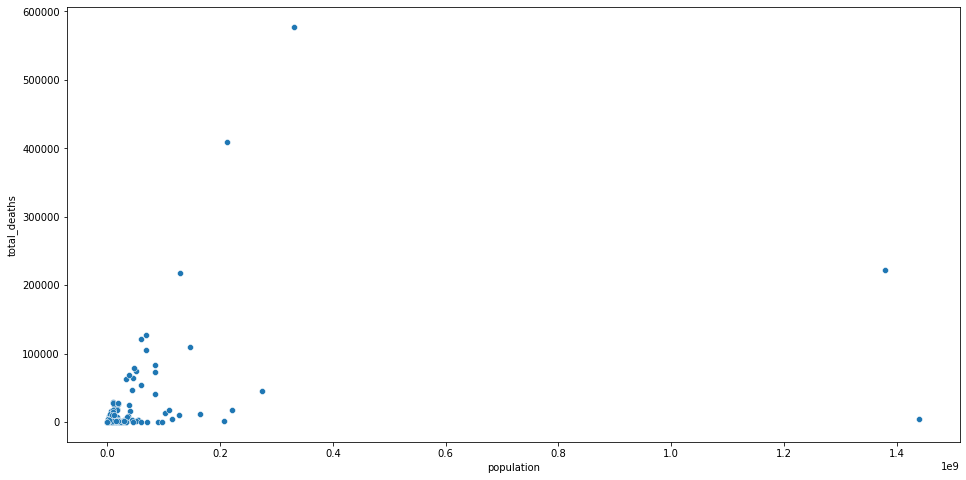

In [7]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="population", y="total_deaths", data=countries)
plt.gca().invert_yaxis()
plt.show();

In [9]:
# Removing CHI and IND since there populations are much larger than the rest of the world.
# Only Removing to get a clearer picture of the other countries
filtered_countries = countries.drop(["CHN", "IND"], axis=0)

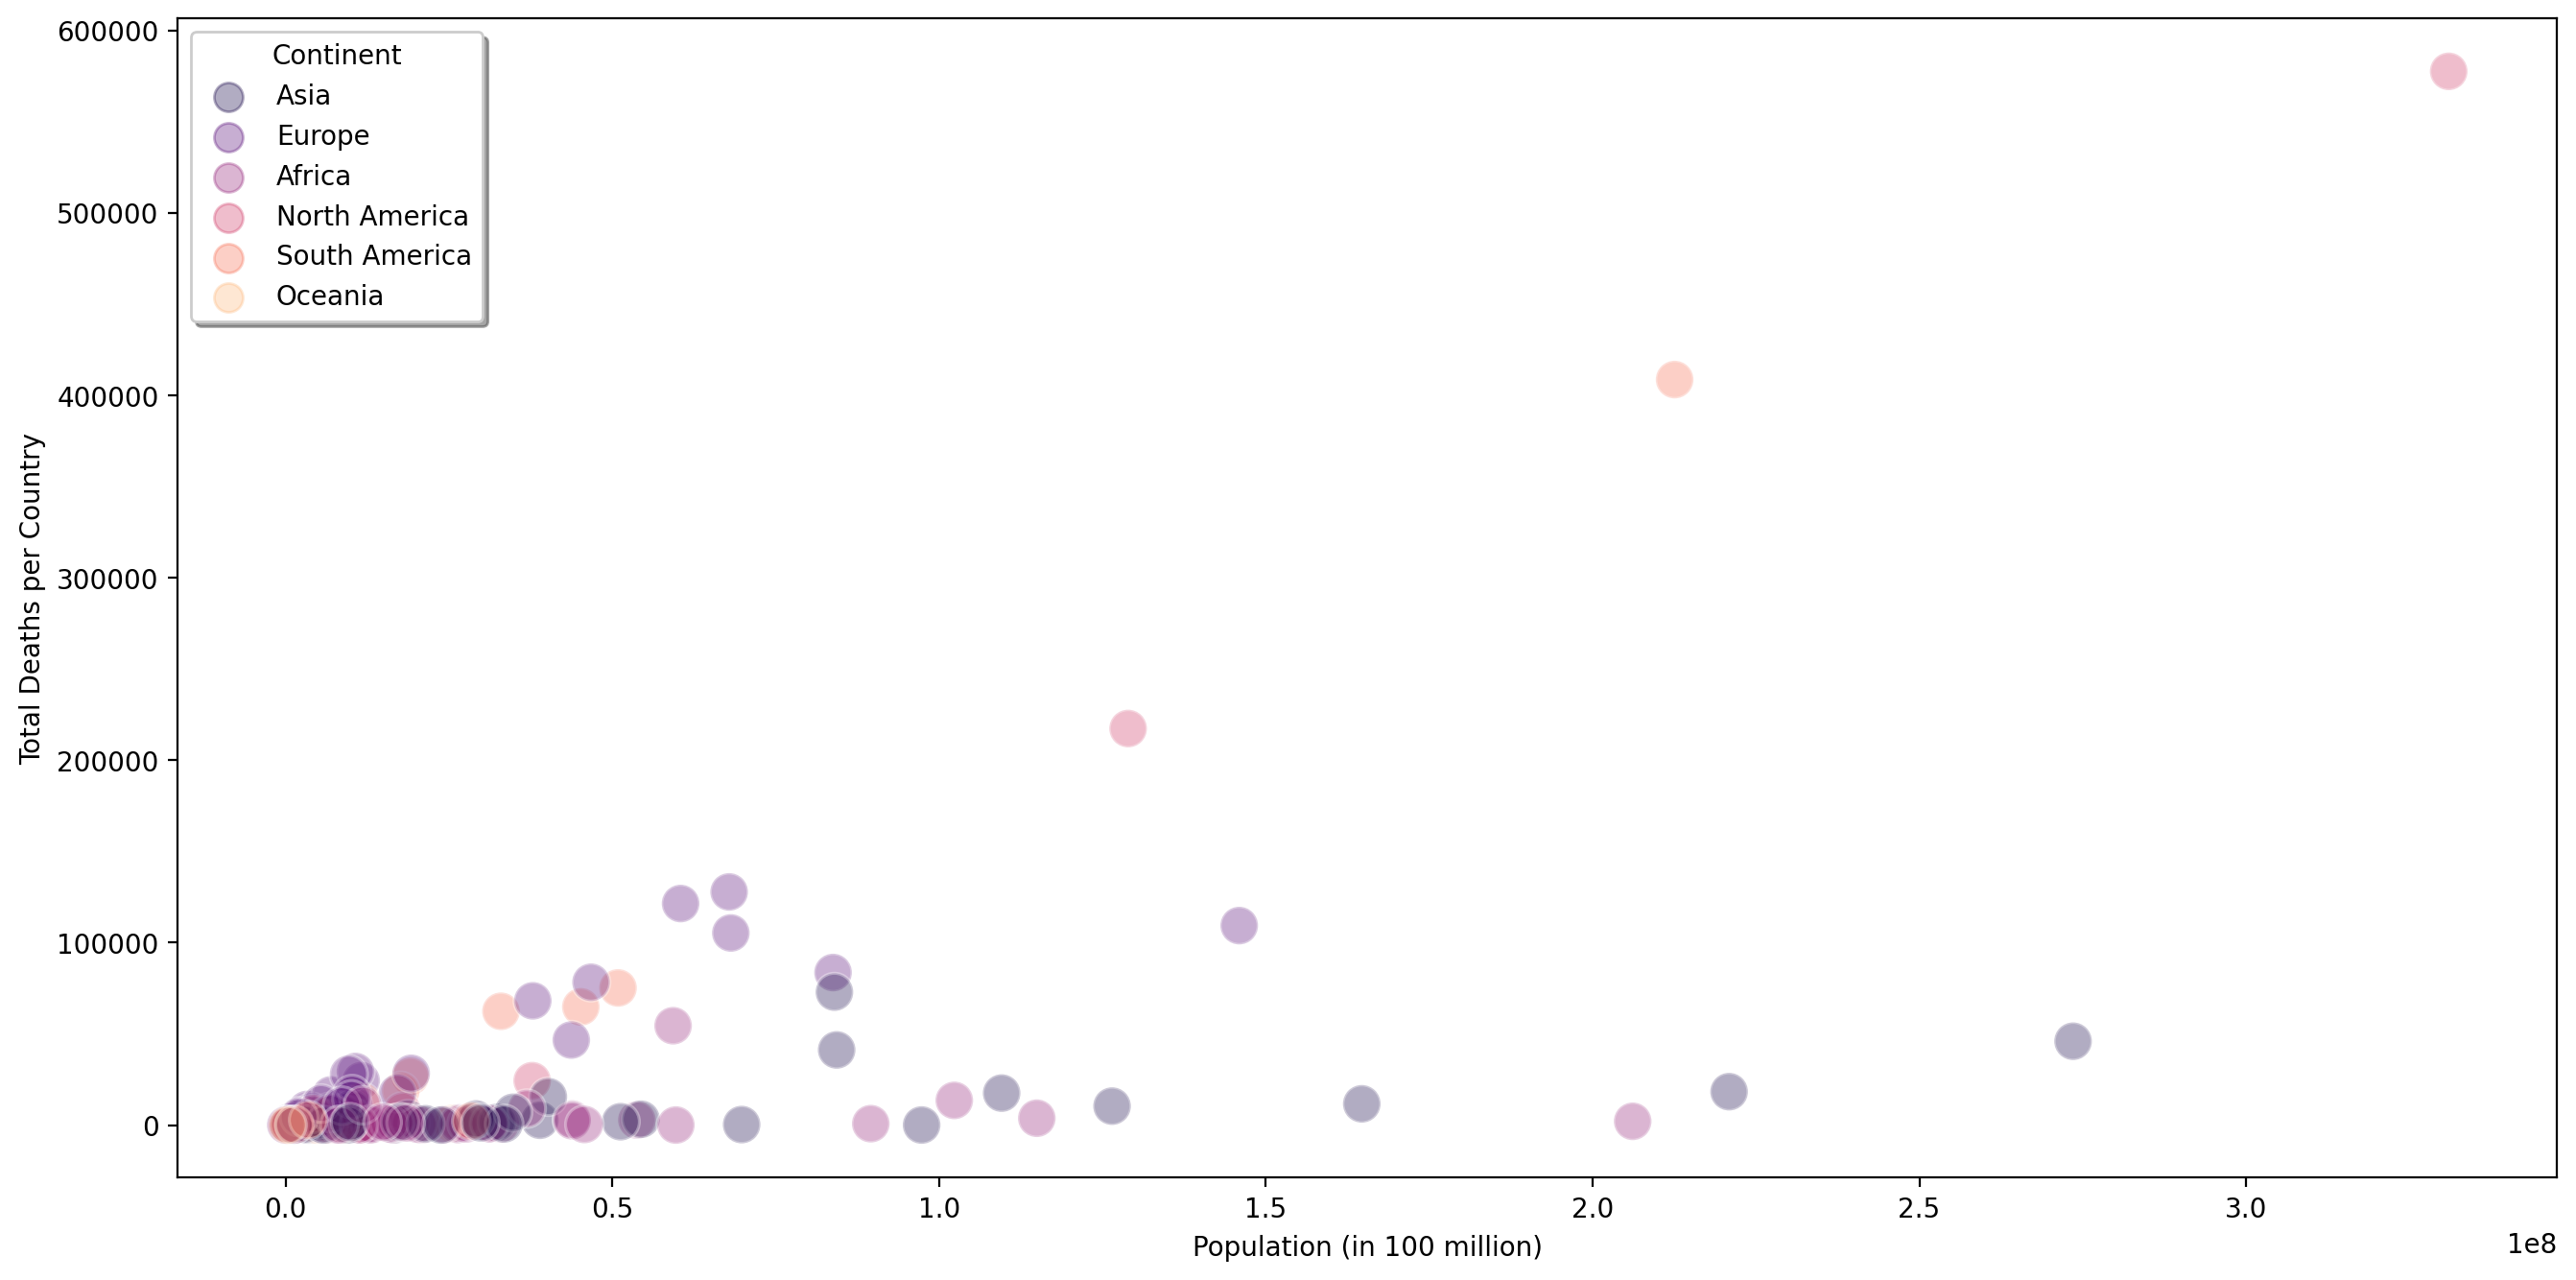

In [10]:
plt.figure(figsize=(16, 8), dpi=200)

scatter = sns.scatterplot(x="population", 
                y="total_deaths", 
                hue="continent",
                palette="magma",
                alpha=0.35,
                s=200, 
                data=filtered_countries)

plt.legend(title="Continent", 
           shadow=True, 
           markerscale=1.80)

for lh in scatter.legend_.legendHandles:
    lh.set_alpha(0.35)

plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")
plt.gca().invert_yaxis()
plt.show();